In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import acquire as aq
import prepare as prep
import explore as ex


from sklearn.model_selection import train_test_split

#Settting matplotlib/seaborn defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

In [2]:
df = aq.get_crime_data(use_cache=True)

Using cached csv


In [3]:
df.head()

,incident_report_number,crime_type,ucr_code,family_violence,occ_date_time,occ_date,occ_time,rep_date_time,rep_date,rep_time,...,y_coordinate,latitude,longitude,location,:@computed_region_a3it_2a2z,:@computed_region_8spj_utxs,:@computed_region_q9nd_rr82,:@computed_region_qwte_z96m,clearance_status,clearance_date
0,20221411560,AGG ASSAULT,402,N,2022-05-21T23:28:00.000,2022-05-21T00:00:00.000,2328,2022-05-21T23:28:00.000,2022-05-21T00:00:00.000,2328,...,3130738.0,30.278679,-97.690473,"{'latitude': '30.27867944', 'longitude': '-97....",2864.0,1.0,8.0,NaN,NaN,NaN
1,20221411686,FAMILY DISTURBANCE,3400,N,2022-05-21T23:25:00.000,2022-05-21T00:00:00.000,2325,2022-05-21T23:25:00.000,2022-05-21T00:00:00.000,2325,...,3135376.0,30.379194,-97.673005,"{'latitude': '30.37919393', 'longitude': '-97....",3642.0,1.0,8.0,NaN,NaN,NaN
2,20221411618,DATING DISTURBANCE,2400,N,2022-05-21T23:17:00.000,2022-05-21T00:00:00.000,2317,2022-05-21T23:17:00.000,2022-05-21T00:00:00.000,2317,...,3107646.0,30.264380,-97.764029,"{'latitude': '30.26438022', 'longitude': '-97....",2859.0,5.0,1.0,1426.0,NaN,NaN
3,20221411720,PUBLIC INTOXICATION,2300,N,2022-05-21T23:07:00.000,2022-05-21T00:00:00.000,2307,2022-05-21T23:07:00.000,2022-05-21T00:00:00.000,2307,...,3112676.0,30.274588,-97.747819,"{'latitude': '30.27458791', 'longitude': '-97....",2856.0,9.0,10.0,NaN,C,2022-05-22T00:00:00.000
4,20221410653,CIVIL DISTURBANCE/DEMO,3402,N,2022-05-21T23:04:00.000,2022-05-21T00:00:00.000,2304,2022-05-21T23:04:00.000,2022-05-21T00:00:00.000,2304,...,3120273.0,30.234682,-97.724824,"{'latitude': '30.23468195', 'longitude': '-97....",3256.0,3.0,3.0,102.0,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   incident_report_number       500000 non-null  int64  
 1   crime_type                   500000 non-null  object 
 2   ucr_code                     500000 non-null  int64  
 3   family_violence              500000 non-null  object 
 4   occ_date_time                500000 non-null  object 
 5   occ_date                     500000 non-null  object 
 6   occ_time                     500000 non-null  int64  
 7   rep_date_time                500000 non-null  object 
 8   rep_date                     500000 non-null  object 
 9   rep_time                     500000 non-null  int64  
 10  location_type                498329 non-null  object 
 11  address                      500000 non-null  object 
 12  zip_code                     497123 non-null  float64
 13 

## Limiting Time Frame
**We decided to limit the time frame of data to improve relevancy and workability.**

In [5]:
df.head(1).occ_date

0    2022-05-21T00:00:00.000
Name: occ_date, dtype: object

In [6]:
# Let's change the data times to the correct data type
df.occ_date = pd.to_datetime(df.occ_date, format = '%Y-%m-%d')

In [7]:
# Let's limit our time frame to 2018 - 2021
df = df[(df.occ_date >= '2018-01-01') & (df.occ_date <= '2021-12-31')]
df.shape

(401955, 31)

## Handling Nulls

In [8]:
# Let's look at nulls now
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401955 entries, 32703 to 434657
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   incident_report_number       401955 non-null  int64         
 1   crime_type                   401955 non-null  object        
 2   ucr_code                     401955 non-null  int64         
 3   family_violence              401955 non-null  object        
 4   occ_date_time                401955 non-null  object        
 5   occ_date                     401955 non-null  datetime64[ns]
 6   occ_time                     401955 non-null  int64         
 7   rep_date_time                401955 non-null  object        
 8   rep_date                     401955 non-null  object        
 9   rep_time                     401955 non-null  int64         
 10  location_type                400861 non-null  object        
 11  address               

In [9]:
prep.attribute_nulls(df)

,rows_missing,percent_missing
incident_report_number,0,0.000000
crime_type,0,0.000000
ucr_code,0,0.000000
family_violence,0,0.000000
occ_date_time,0,0.000000
occ_date,0,0.000000
occ_time,0,0.000000
rep_date_time,0,0.000000
rep_date,0,0.000000
rep_time,0,0.000000


In [10]:
df.family_violence.value_counts(dropna=False)

N    371764
Y     30191
Name: family_violence, dtype: int64

In [11]:
df.head()

,incident_report_number,crime_type,ucr_code,family_violence,occ_date_time,occ_date,occ_time,rep_date_time,rep_date,rep_time,...,y_coordinate,latitude,longitude,location,:@computed_region_a3it_2a2z,:@computed_region_8spj_utxs,:@computed_region_q9nd_rr82,:@computed_region_qwte_z96m,clearance_status,clearance_date
32703,20228000540,THEFT FROM PERSON,610,N,2021-12-31T23:58:00.000,2021-12-31,2358,2022-01-03T09:08:00.000,2022-01-03T00:00:00.000,908,...,3115469.0,30.266787,-97.739178,"{'latitude': '30.26678659', 'longitude': '-97....",2856.0,9.0,10.0,83.0,NaN,NaN
32704,20213651544,PUBLIC INTOXICATION,2300,N,2021-12-31T23:50:00.000,2021-12-31,2350,2021-12-31T23:50:00.000,2021-12-31T00:00:00.000,2350,...,3115566.0,30.267300,-97.738857,"{'latitude': '30.2672999', 'longitude': '-97.7...",2856.0,9.0,10.0,NaN,C,2021-12-31T00:00:00.000
32705,20225000622,THEFT,600,N,2021-12-31T23:50:00.000,2021-12-31,2350,2022-01-07T14:12:00.000,2022-01-07T00:00:00.000,1412,...,3127324.0,30.215264,-97.703019,"{'latitude': '30.21526412', 'longitude': '-97....",3256.0,3.0,3.0,806.0,N,2022-01-10T00:00:00.000
32706,20213651545,ASSAULT ON PUBLIC SERVANT,903,N,2021-12-31T23:50:00.000,2021-12-31,2350,2021-12-31T23:50:00.000,2021-12-31T00:00:00.000,2350,...,3114083.0,30.263739,-97.743651,"{'latitude': '30.26373894', 'longitude': '-97....",2856.0,9.0,10.0,NaN,C,2022-01-03T00:00:00.000
32707,20213651542,DOC DISCHARGE GUN - PUB PLACE,2408,N,2021-12-31T23:47:00.000,2021-12-31,2347,2021-12-31T23:47:00.000,2021-12-31T00:00:00.000,2347,...,3129299.0,30.328049,-97.693683,"{'latitude': '30.32804875', 'longitude': '-97....",3641.0,4.0,9.0,202.0,N,2022-01-05T00:00:00.000


In [12]:
df = prep.prep_data(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349530 entries, 32704 to 434657
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   crime_type        349530 non-null  object        
 1   family_violence   349530 non-null  object        
 2   occurence_date    349530 non-null  datetime64[ns]
 3   occurence_time    349530 non-null  object        
 4   report_date       349530 non-null  datetime64[ns]
 5   report_time       349530 non-null  object        
 6   location_type     349530 non-null  object        
 7   address           349530 non-null  object        
 8   zip_code          349530 non-null  float64       
 9   council_district  349530 non-null  float64       
 10  sector            349530 non-null  object        
 11  district          349530 non-null  object        
 12  latitude          349530 non-null  float64       
 13  longitude         349530 non-null  float64       
 14  

In [13]:
df.info

<bound method DataFrame.info of                            crime_type family_violence occurence_date  \
32704             PUBLIC INTOXICATION               N     2021-12-31   
32705                           THEFT               N     2021-12-31   
32706       ASSAULT ON PUBLIC SERVANT               N     2021-12-31   
32707   DOC DISCHARGE GUN - PUB PLACE               N     2021-12-31   
32708     AGG ASLT STRANGLE/SUFFOCATE               Y     2021-12-31   
...                               ...             ...            ...   
434652                     HARASSMENT               N     2018-01-01   
434653                     HARASSMENT               N     2018-01-01   
434654       POSS OF FIREARM BY FELON               Y     2018-01-01   
434655         BURGLARY NON RESIDENCE               N     2018-01-01   
434657                  FRAUD - OTHER               N     2018-01-01   

       occurence_time report_date report_time  \
32704           23:50  2021-12-31       23:50   
32705

In [14]:
# Use .describe with object columns
obj_cols = df.columns[[df[col].dtype == 'O' for col in df.columns]]
obj_cols

for col in obj_cols:
    print(col.upper())
    print('Count:')
    print(df[col].value_counts())
    print('\n')
    print('Proportions:')
    print(df[col].value_counts(normalize=True, dropna=False))
    print('--------------------------')
    print('\n')

CRIME_TYPE
Count:
BURGLARY OF VEHICLE               34883
THEFT                             29936
FAMILY DISTURBANCE                24386
CRIMINAL MISCHIEF                 19381
ASSAULT W/INJURY-FAM/DATE VIOL    12856
                                  ...  
ABUSE OF CORPSE                       1
COMMERCIAL BRIBERY                    1
ATT BURGLARY OF RESIDENCE             1
MANF SYNTHETIC MARIJUANA              1
BAIL JUMPING/FAIL TO APPEAR           1
Name: crime_type, Length: 341, dtype: int64


Proportions:
BURGLARY OF VEHICLE               0.099800
THEFT                             0.085646
FAMILY DISTURBANCE                0.069768
CRIMINAL MISCHIEF                 0.055449
ASSAULT W/INJURY-FAM/DATE VIOL    0.036781
                                    ...   
ABUSE OF CORPSE                   0.000003
COMMERCIAL BRIBERY                0.000003
ATT BURGLARY OF RESIDENCE         0.000003
MANF SYNTHETIC MARIJUANA          0.000003
BAIL JUMPING/FAIL TO APPEAR       0.000003
Name: crim

## Univariate Exploration

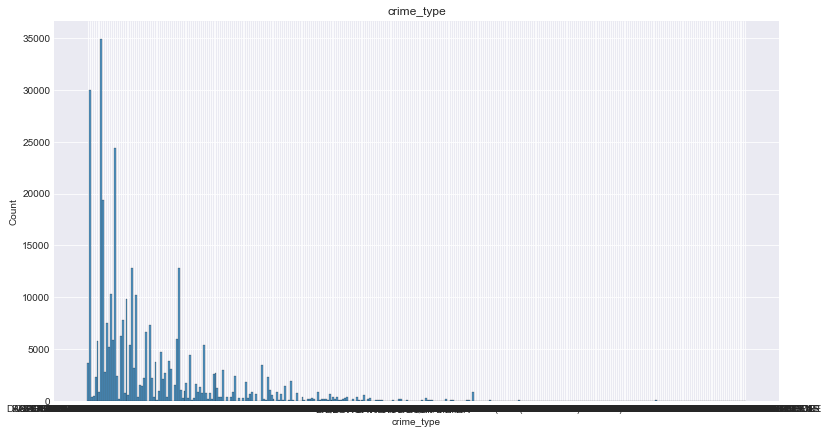

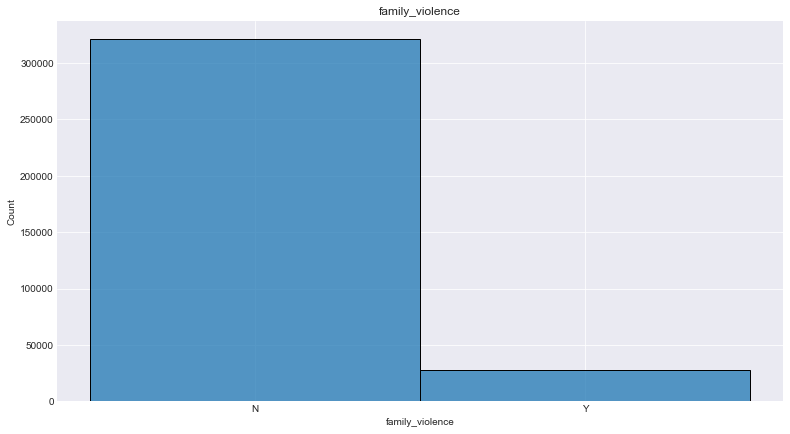

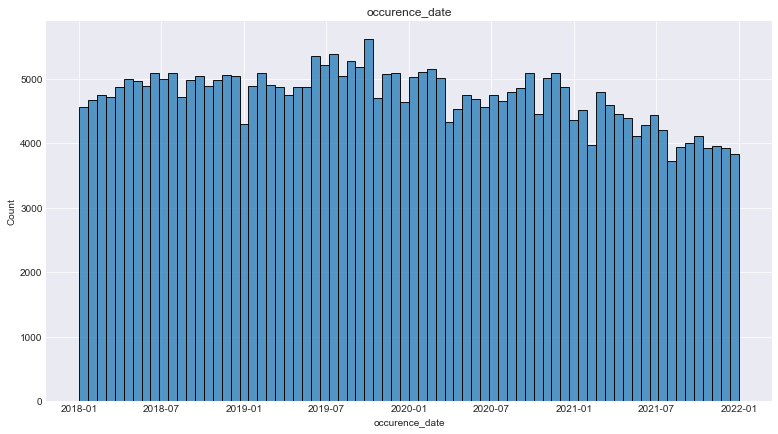

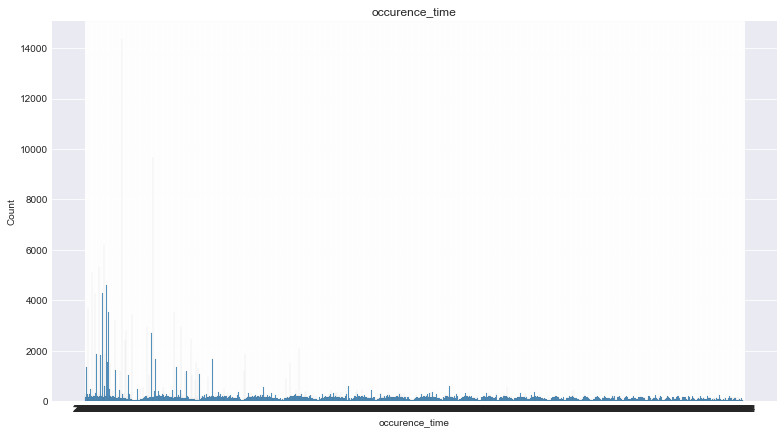

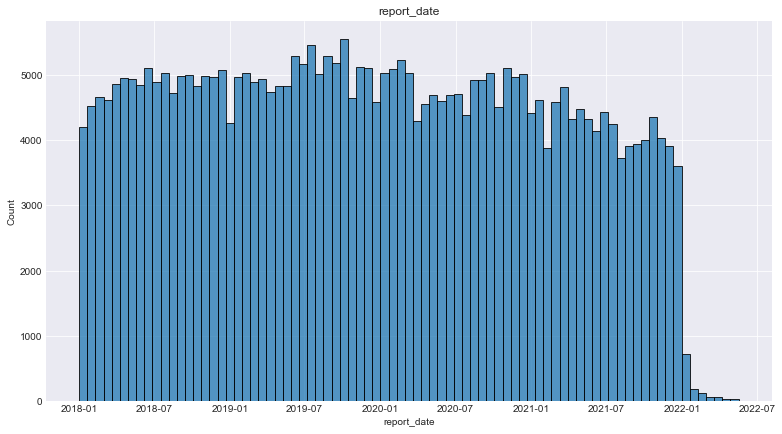

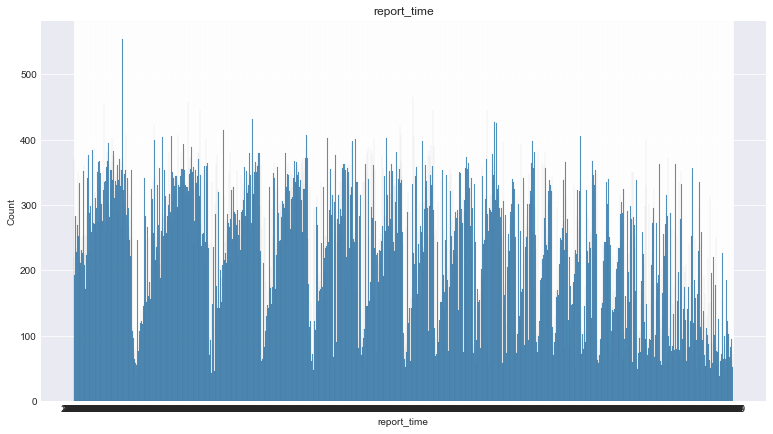

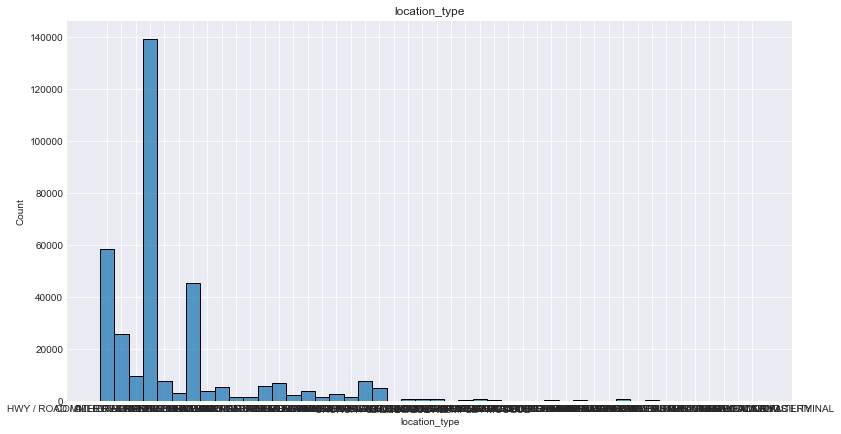

In [ ]:
# Start by looking at distributions
ex.plot_distributions(df)